# Linear regression vehicle price predictor

## About the dataset
**This dataset contains information about used cars listed on www.cardekho.com
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
The columns in the given dataset is as follows:**
* Car_Name
* Year
* Selling_Price
* Present_Price
* Kms_Driven
* Fuel_Type
* Seller_Type
* Transmission
* Owner

# Importing libraries

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#core imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline




# Importing the dataset

In [4]:
vehicles=pd.read_csv(r"C:\Users\Yakov\Downloads\carData.csv")

# Exploring the data

Now We will run some exploratory analysis on our cardekho dataset now that it is loaded in the vehicles variable.We would check for the shape of the dataset, any missing or null values and will try to find out the correlation amongst the dataset features.

In [5]:
vehicles.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
vehicles.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Looking at the result of the above query it seems clear we have no missing/null values in our dataset**

In [8]:
vehicles.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Visualization

**Visualizing the categorical data :**
## 1. Owner Type
Let's examine the selling price based on the type of owner

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

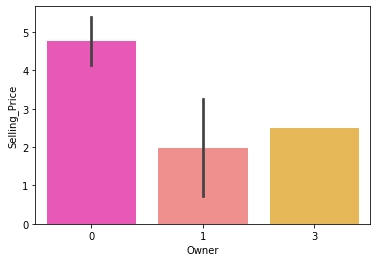

In [9]:
sns.barplot(x='Owner',y='Selling_Price',data=vehicles,palette='spring')

**It seems that the vehicles belonging to owner 0 have the highest selling price**

## 2. Transmission Type


<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

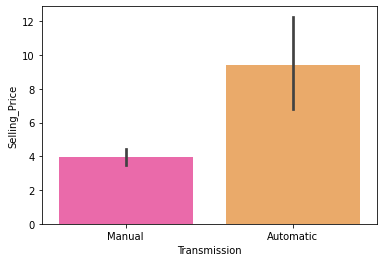

In [11]:
sns.barplot(x='Transmission',y='Selling_Price',data=vehicles,palette='spring')

**We can see tha automatic vehicles are found to have a large resale value in the market compared to manual transmission.**

## 3. Fuel Type

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

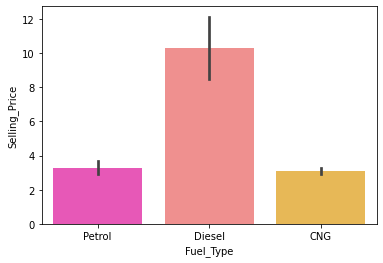

In [13]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=vehicles,palette='spring')

## 4. Seller Type

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

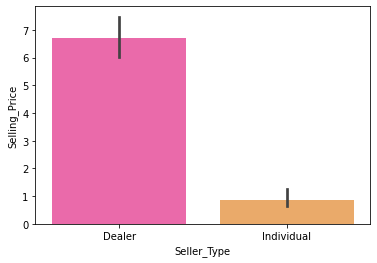

In [14]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=vehicles,palette='spring')

**This makes sense, since dealers can sell vehicles at a higher selling price than a general individual.**

**Visualizing the relationship between Target Variable[Selling price] against Kms Driven,Present_Price and Vehicle age :**
## 1. Kms Driven

<Figure size 720x720 with 0 Axes>

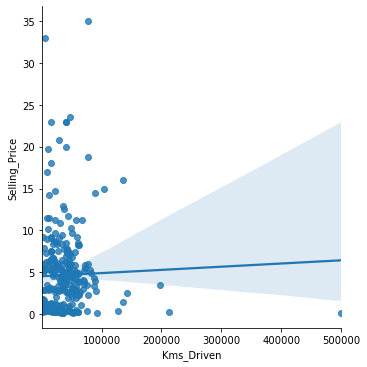

In [16]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Kms_Driven',y='Selling_Price',data=vehicles)

 **The selling price is found to be higher for vehicles with less kms covered under the belt.**

## 2. Present Price

<Figure size 720x720 with 0 Axes>

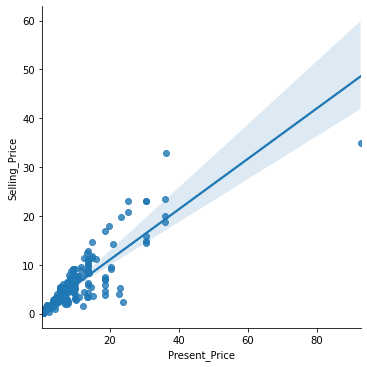

In [17]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Present_Price',y='Selling_Price',data=vehicles)

**Selling Price tends to increase gradually with an increase in the Present Price of the vehicle.**

## 3. Vehicle Age

In [18]:
#creating a new column 'Vehicle_Age' and storing the age of the vehicles to establish a direct relationship between the age and selling price
vehicles['Vehicle_Age']=2020- vehicles['Year']


vehicles.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0,2
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0,5
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0,5
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,4
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0,5


<AxesSubplot:xlabel='Vehicle_Age', ylabel='Selling_Price'>

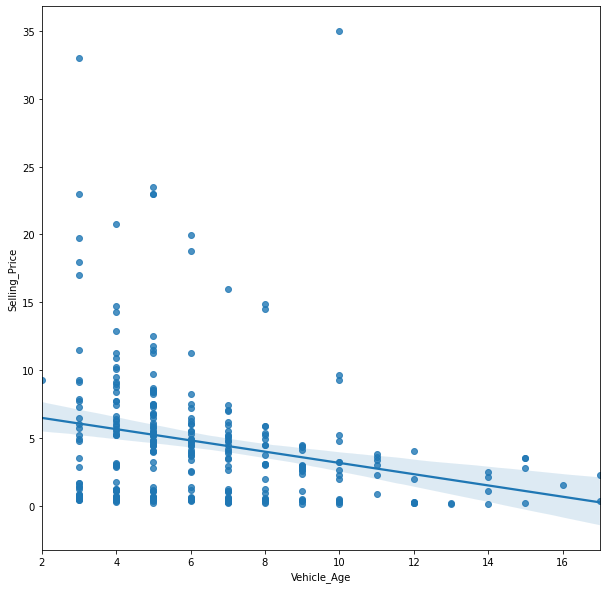

In [19]:
plt.figure(figsize=(10,10))
sns.regplot(x='Vehicle_Age',y='Selling_Price',data=vehicles)

**It seems the selling price decreases overall for older/ageing vehicles**

# Feature Engineering

In [20]:
#using Pandas' built in function 'get_dummies()' to swiftly map the categorical values to integers like (0/1/2/3....)
vehicles=pd.get_dummies(vehicles,columns=['Fuel_Type','Transmission','Seller_Type'],drop_first=True)

#dropping the Year column since it becomes redundant and irrelevant after Vehicle_Age column
vehicles.drop(columns=['Year'],inplace=True)

#check out the dataset with new changes
vehicles.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Owner,Vehicle_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual
0,ritz,3.35,5.59,27000,0,6,0,1,1,0
1,sx4,4.75,9.54,43000,0,7,1,0,1,0
2,ciaz,7.25,9.85,6900,0,3,0,1,1,0
3,wagon r,2.85,4.15,5200,0,9,0,1,1,0
4,swift,4.60,6.87,42450,0,6,1,0,1,0


* Fuel attribute is now divided into two new attributes where '01' denotes Petrol, '10' denotes Diesel and '00' denotes CNG.
* Transmission attribute is mapped to Transmission_Manual where '1' denotes Manual and '0' Automatic.
* Seller_Type attribute is mapped to Seller_Type_Individual where '1' denotes Seller_Type_Dealer  and '0' Seller_Type_Individual.

## Understanding and Visualizing Correlations amongst the features

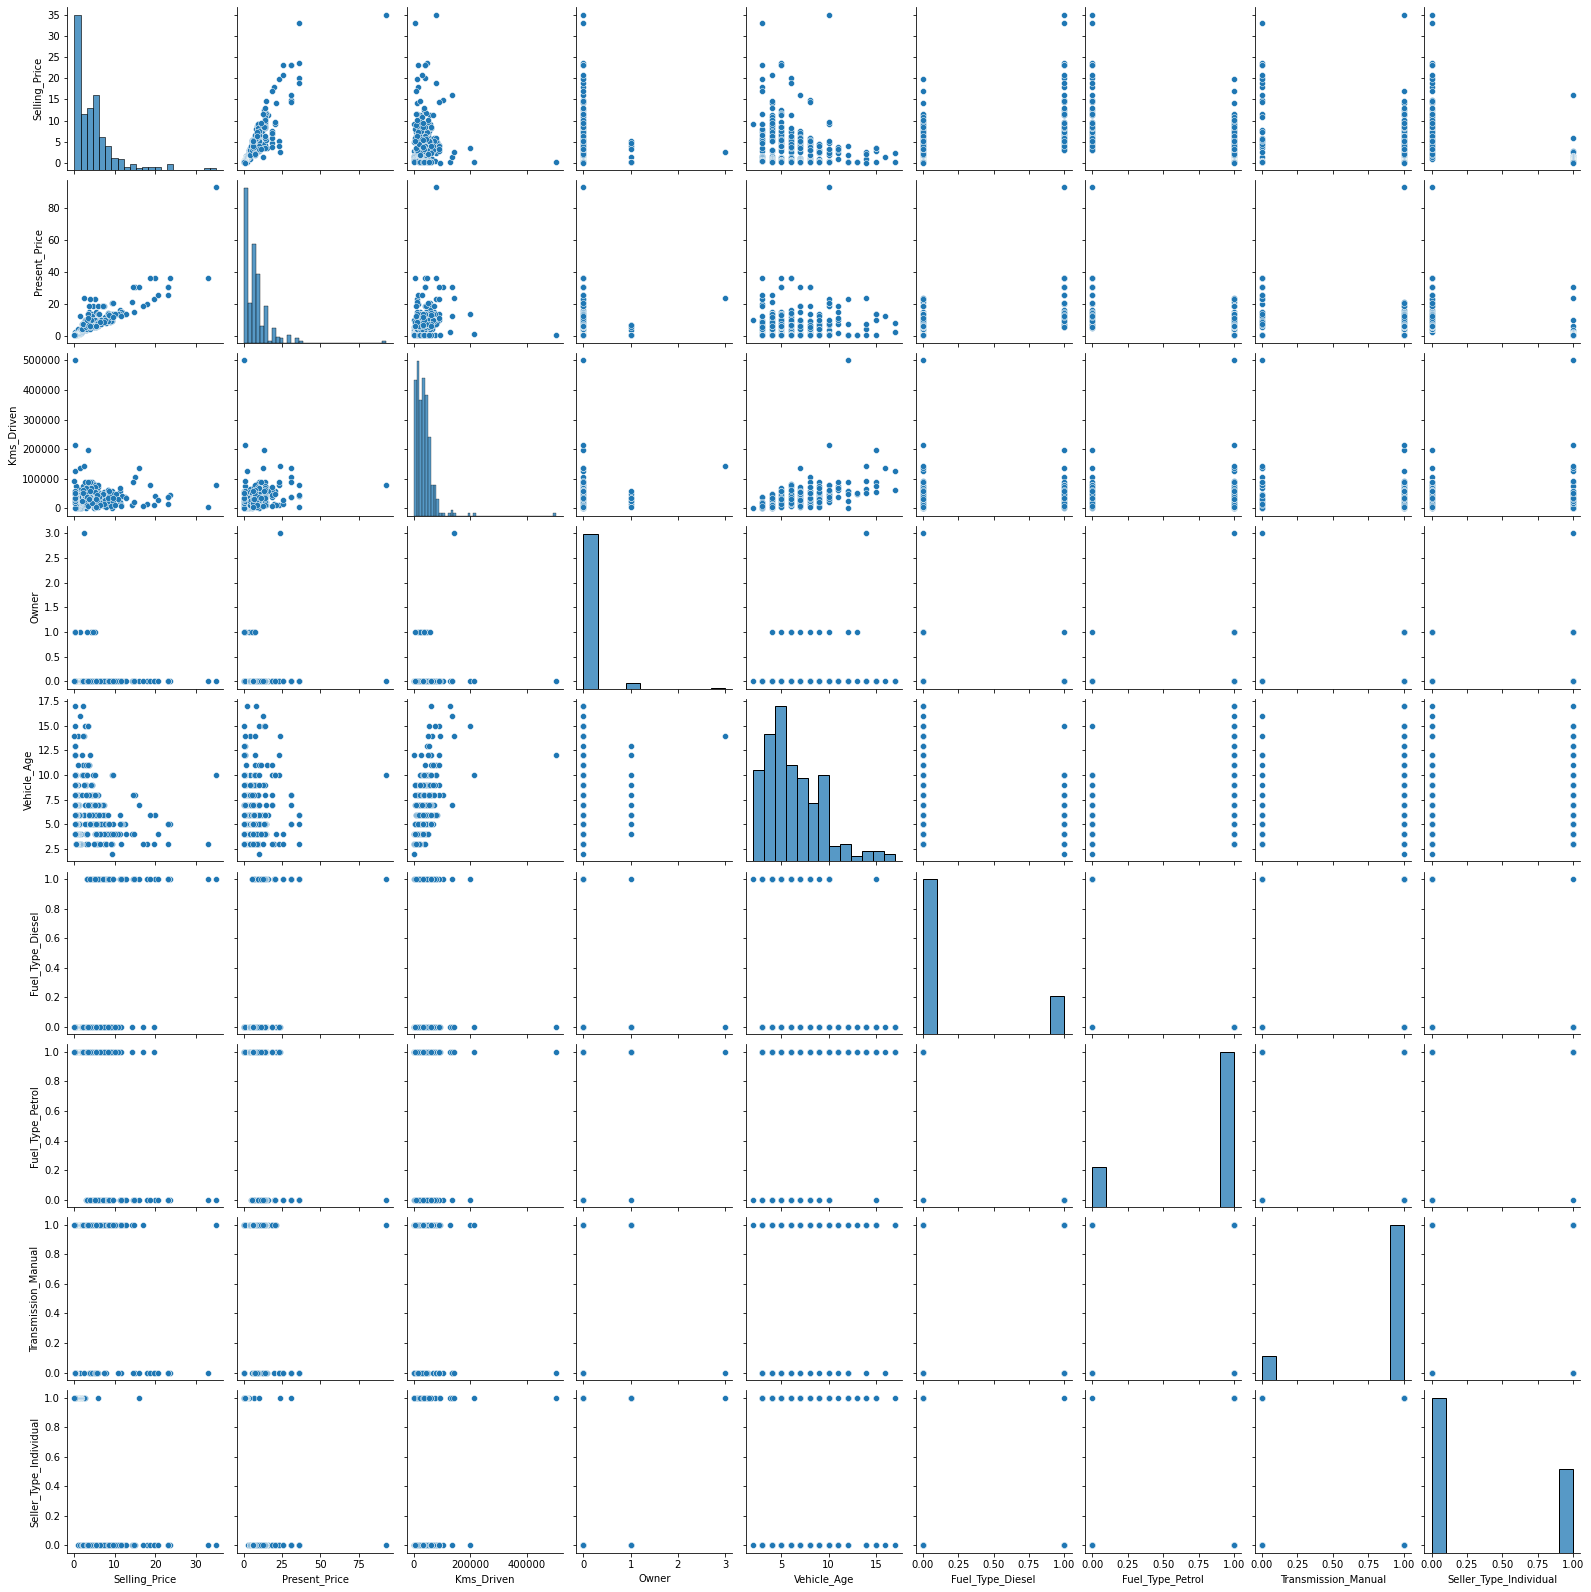

In [22]:
sns.pairplot(vehicles)

* The pair plot technique allows us to visualize distributions of individual numerical features, as well as correlations/relationships between numerical features. 
* Selling price seems to be considerably correlated with the Present Price feature.

## Correlation HeatMap

<AxesSubplot:>

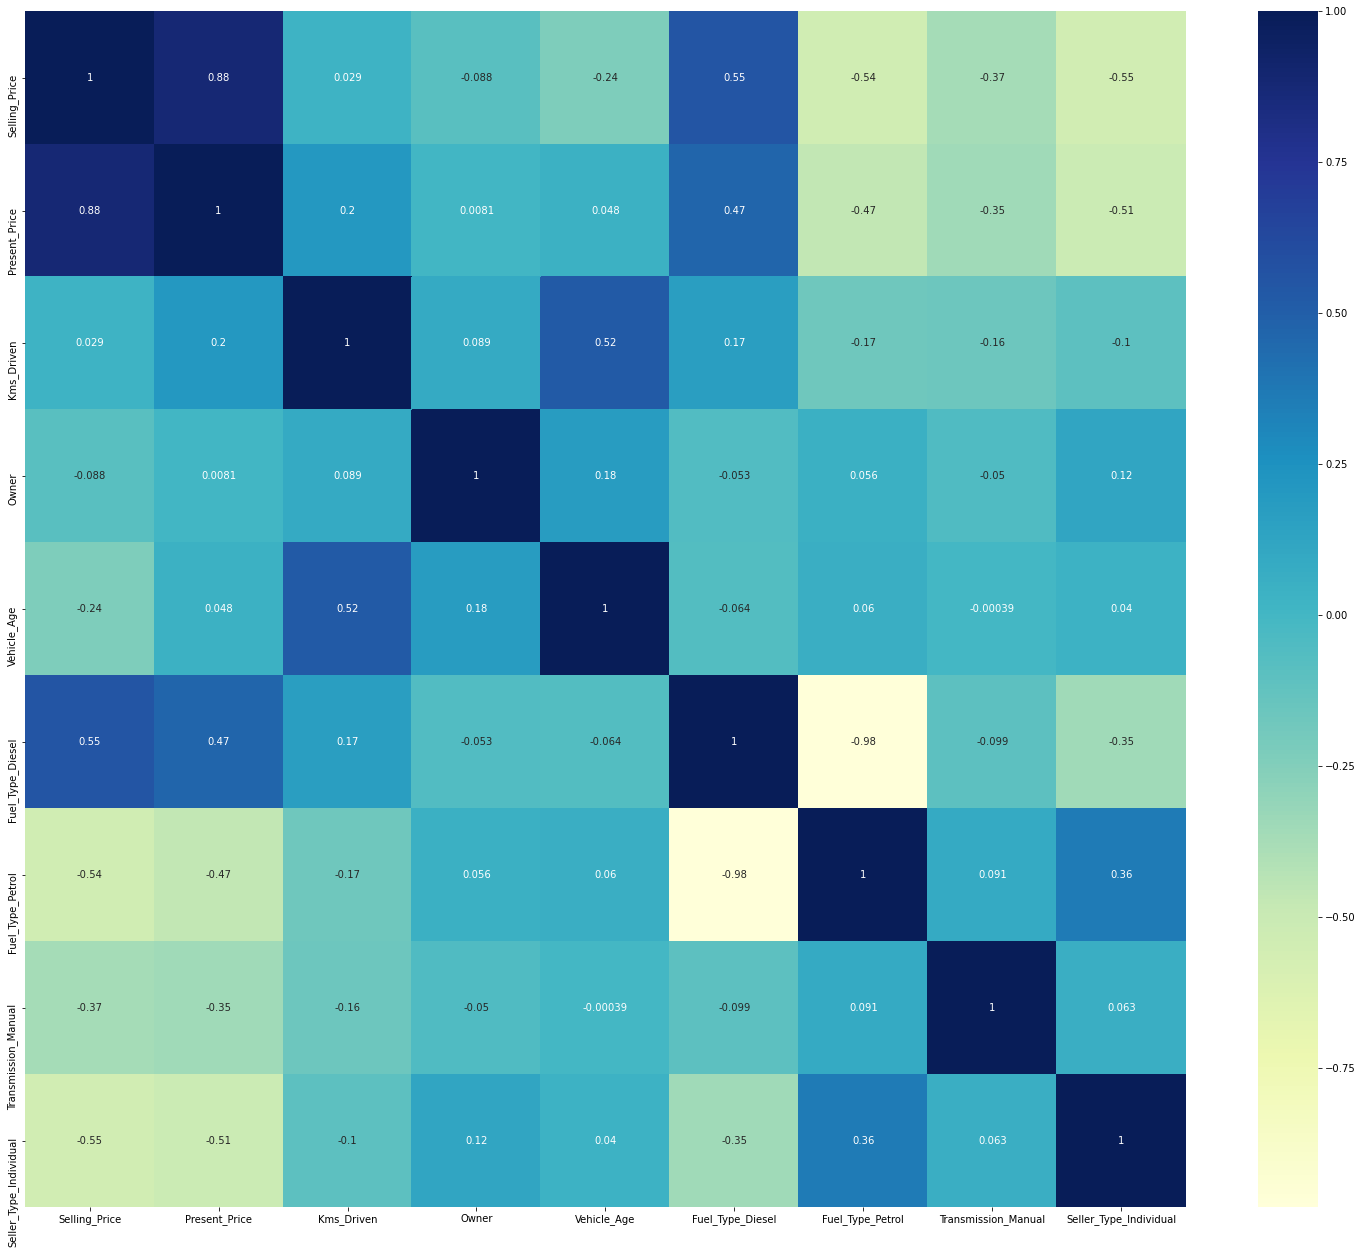

In [23]:
correlations = vehicles.corr()

indx=correlations.index
plt.figure(figsize=(26,22))
sns.heatmap(vehicles[indx].corr(),annot=True,cmap="YlGnBu")

# Training the Linear Regression Model

We will need to first split up our data into an vehicles_train array that contains the part of dataset used for training data, and a vehicles_test array used for test data.

## 1. Train Test Split

In [24]:
# We're splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split

np.random.seed(0)
vehicles_train,vehicles_test = train_test_split(vehicles, test_size=0.3, random_state=100)

# We'll perform feature scaling to ensure normalization of the data within a particular range.
#Sometimes, it also helps in speeding up the calculations in an algorithm.
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

#features we need to scale are assigned as a list.
var=['Selling_Price','Present_Price','Kms_Driven','Vehicle_Age']

#scaling the training data(fitting the parameters and transforming the values)
vehicles_train[var]=scaler.fit_transform(vehicles_train[var])

#transforming the test data.We avoid fitting the values to prevent data leakage!
vehicles_test[var]=scaler.transform(vehicles_test[var])

#We will toss out the Car_Name column from training and test data because it only has text info that the linear regression model can't use!

X_test=vehicles_test.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_test=vehicles_test['Selling_Price']

X_train=vehicles_train.drop(columns=['Car_Name','Selling_Price'],axis=1)
y_train=vehicles_train['Selling_Price']

## 2. Creating and Training the Model

In [25]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

## 3. Model Evaluation
Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [26]:
# print the intercept of best-fit line
print(lm.intercept_)

0.17857294626649228


In [27]:
# temp here stores the numerical columns from the vehicles dataset that influence the prediction
temp=vehicles.drop(columns=['Car_Name','Selling_Price'])

coeff_df = pd.DataFrame(lm.coef_,temp.columns,columns=['Coefficient'])
coeff_df 

,Coefficient
Present_Price,0.742407
Kms_Driven,-0.041166
Owner,0.117336
Vehicle_Age,-0.227644
Fuel_Type_Diesel,0.486842
Fuel_Type_Petrol,0.081617
Transmission_Manual,-0.312737
Seller_Type_Individual,-0.221881


### Interpreting the coefficients:

**For numerical features:**
* Holding all other features fixed, a 1 unit increase in Present_Price is associated with an increase of 0.742.
* Holding all other features fixed, a 1 unit increase in Kms_Driven is associated with a decrease of .0411.
* Holding all other features fixed, a 1 unit increase in Vehicle_Age means decrease in 0.22764.

# Predictions from our Model

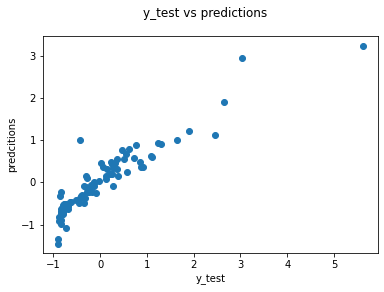

In [29]:
predictions=lm.predict(X_test)


fig = plt.figure()
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predcitions')
plt.scatter(y_test,predictions)

**Residual Histogram**

Text(0.5, 0.98, 'Residual Analysis')

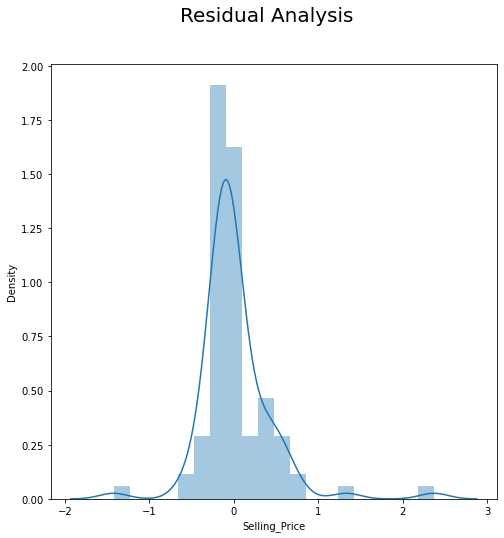

In [30]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot((y_test-predictions),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)  

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2522278859371734
MSE: 0.17152491124206032
RMSE: 0.4141556606423004


In [32]:
R2 = metrics.r2_score(y_test,predictions)
R2

0.8316982715837705

## 6. Conclusions

* Present price of a car directly influences Selling Price prediction. Both are highly correlated and here directly proportional to each other.
* Resale value of Automatic vehicle is more than that of a Manual vehicle.
* Car age is effecting negatively as the Selling Price decreases for an older car.
* Resale value of cars with Fuel type Diesel is higher.